In [1]:
import os
# running from Root directory
os.chdir("..")

In [15]:
from post_motif_analysis.network_utils import draw_sub_graph, draw_neighbors, node_properties
from networks.loaders.network_loader import NetworkLoader
from utils.types import NetworkInputType, NetworkLoaderArgs
from networks.network import Network
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import Any

simple_input_args = NetworkLoaderArgs(
    synapse_threshold=5,
    filter_polarity=['+', '-', 'complex'],
    filter_prim_nt=['GABA', 'Glu', 'ACh', 0],
    filter_syn_type='all',
    filter_sex_type='herm'
)
loader = NetworkLoader(simple_input_args)

#network = loader.load_network_file(file_path="networks/data/polarity_2020/s1_data.xlsx",
#                                    input_type=NetworkInputType.polarity_xlsx)

network = loader.load_network_file(file_path="networks/data/Cook_2019/SI 2 Synapse adjacency matrices.xlsx",
                                    input_type=NetworkInputType.worm_wiring_xlsx)


#network = loader.load_network_file(file_path="networks/data/Cook_2019/SI 5 Connectome adjacency matrices, corrected July 2020.xlsx",
#                                    input_type=NetworkInputType.worm_wiring_xlsx)



Filtering Neurons of: herm
Filtering Synapses of type: all
Network file name: SI 2 Synapse adjacency matrices.xlsx

Network properties:
	Neurons in the network: 272
	Participating Neurons (in the graph): 253

	Participating Nodes are neurons with at least: 5 synapses
	Synapses in the network: 9580
	Synapses in the graph: 5545
	Gaps in the network: 3474
	Gaps in the graph: 1038
	Nodes: 234
	Edges: 697
	Average clustering coefficient: 0.165
	Average shortest path (undirected): 2.541
	Density: 0.013
	Degree: Mean: 5.957 Std: 5.64 Median: 4.0 Max: 46 (node: AVAL)
	In-Degree: Mean: 2.979 Std: 3.917 Median: 2.0 Max: 30 (node: AVAL)
	Out-Degree: Mean: 2.979 Std: 2.598 Median: 2.0 Max: 16 (node: AVAL)


In [3]:
def basic_plot(data: Any, title: str, xlabel: str, ylabel: str, plot_func: Any, log_scale=False):
    plt.figure()

    if log_scale:
        plt.yscale("log")
        plt.xscale("log")

    plot_func(*data)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

In [4]:
def plot_rich_club_coefficient(network: Network):
    un_dir_graph = nx.Graph(network.graph)
    un_dir_graph.remove_edges_from(nx.selfloop_edges(un_dir_graph))
    rc = nx.rich_club_coefficient(un_dir_graph, normalized=False, seed=42)
    data = list(rc.keys()), list(rc.values())
    basic_plot(data=data,
               title='Rich Club Coefficient',
               xlabel='Degree (k)',
               ylabel='Rich Club Coefficient',
               plot_func=plt.scatter)


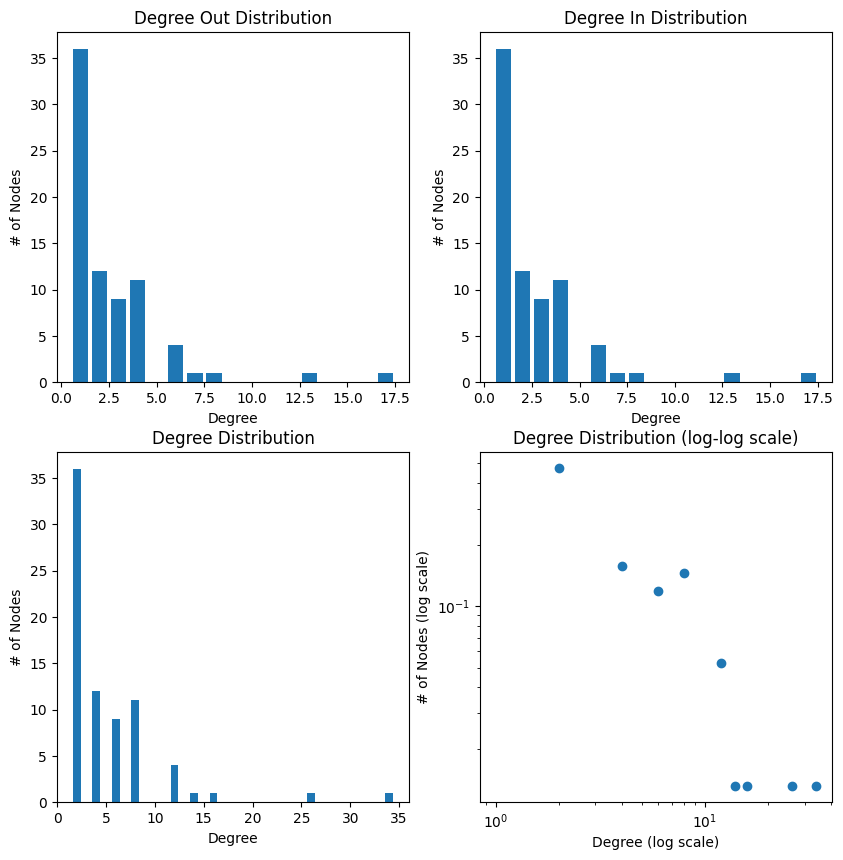

In [5]:
def _set_bar_subplot(ax, data, title, xlabel, ylabel):
    ax.bar(*data)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_degree_dist(network: Network):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    
    degree_sequence = sorted((d for n, d in network.graph.out_degree), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[0,0], data, 'Degree Out Distribution', 'Degree', '# of Nodes')

    degree_sequence = sorted((d for n, d in network.graph.in_degree), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[0,1], data, 'Degree In Distribution', 'Degree', '# of Nodes')

    degree_sequence = sorted((d for n, d in network.graph.degree()), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[1,0], data, 'Degree Distribution', 'Degree', '# of Nodes')

    # Log-Log
    y = nx.degree_histogram(network.graph)
    x = np.arange(0, len(y)).tolist()
    n = network.graph.number_of_nodes()

    for i in range(len(y)):
        y[i] = y[i] / n
    
    ax[1,1].plot(x, y, 'o')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xlabel('Degree (log scale)')
    ax[1,1].set_yscale('log')
    ax[1,1].set_ylabel('# of Nodes (log scale)')
    ax[1,1].set_title('Degree Distribution (log-log scale)')


plot_degree_dist(network)

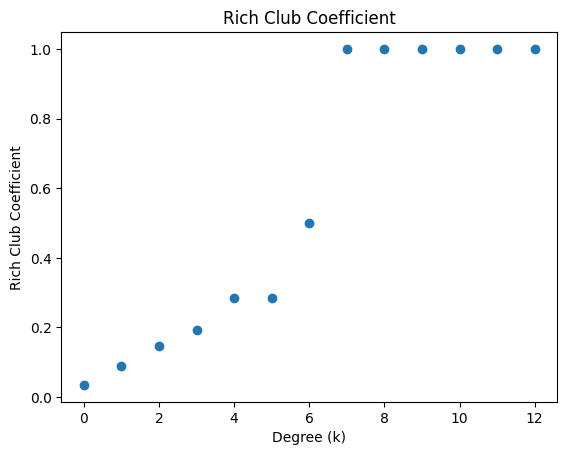

In [6]:
plot_rich_club_coefficient(network)

['AVDR', 'AVAL', 'PVCL', 'PVCR', 'DA04', 'DA05', 'DA07', 'DA08', 'AS11', 'VA06', 'VA10', 'VA11']


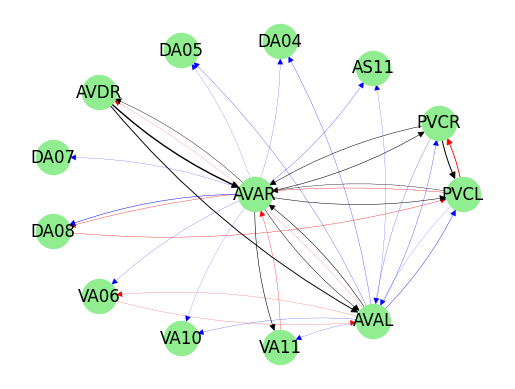

In [16]:
draw_neighbors(network, 'AVAR', 'out', True)

In [8]:
draw_sub_graph(network, ['RIML'], True)

empty graph


In [9]:
draw_sub_graph(network, ['RIML'], True)

empty graph


In [10]:
node_properties(network, 'AVAL')

Node AVAL properties:
Degree: 34
Out Degree: 17
In Degree: 17
Clustering coefficient: 0.11


TMP

In [11]:
head_neurons = [
    'ADAR', 'ADAL', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL', 'AFDR', 'AIAL', 'AIAR',
    'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALA', 'ALML',
    'ALMR', 'ALNL', 'ALNR', 'AQR', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR',
    'ASJL', 'ASJR', 'ASKL', 'ASKR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVDR',
    'AVEL', 'AVER', 'AVFL', 'AVFR', 'AVHL', 'AVHR', 'AVJL', 'AVJR', 'AVKL', 'AVKR', 'AVL', 'AVM',
    'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL', 'BAGR', 'BDUL', 'BDUR', 'CEPDL', 'CEPDR',
    'CEPVL', 'CEPVR', 'DVA', 'DVC', 'FLPL', 'FLPR', 'HSNL', 'HSNR', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R',
    'IL1VL', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'OLLL', 'OLLR', 'OLQDL',
    'OLQDR', 'OLQVL', 'OLQVR', 'PLNL', 'PLNR', 'PVCL', 'PVCR', 'PVNL', 'PVNR', 'PVPL', 'PVPR', 'PVQL',
    'PVQR', 'PVR', 'PVT', 'RIAL', 'RIAR', 'RIBL', 'RIBR', 'RICL', 'RICR', 'RID', 'RIFL', 'RIFR',
    'RIGL', 'RIGR', 'RIH', 'RIML', 'RIMR', 'RIPL', 'RIPR', 'RIR', 'RIS', 'RIVL', 'RIVR', 'RMDDL',
    'RMDDR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RMED', 'RMEL', 'RMER', 'RMEV', 'RMFL', 'RMFR', 'RMGL',
    'RMGR', 'RMHL', 'RMHR', 'SAADL', 'SAADR', 'SAAVL', 'SAAVR', 'SDQL', 'SDQR', 'SIADL', 'SIADR',
    'SIAVL', 'SIAVR', 'SIBDL', 'SIBDR', 'SIBVL', 'SIBVR', 'SMBDL', 'SMBDR', 'SMBVL', 'SMBVR', 'SMDDL',
    'SMDDR', 'SMDVL', 'SMDVR', 'URADL', 'URADR', 'URAVL', 'URAVR', 'URBL', 'URBR', 'URXL', 'URXR',
    'URYDL', 'URYDR', 'URYVL', 'URYVR', 'VB01'
]

In [12]:
neuron = 'AVAL'
in_neighbors = [network.neuron_names[i] for i in
                    list(network.graph.predecessors(network.neuron_names.index(neuron)))]
#print(in_neighbors)
print('input neurons in graph', len(in_neighbors))

in_neighbors_in_head = [n for n in in_neighbors if n in head_neurons]
in_neighbors_in_head.sort()
print('input neurons in head', len(in_neighbors_in_head))

tar = network.neuron_names.index(neuron)
for n in in_neighbors_in_head:
    src = network.neuron_names.index(n)
    syn = network.graph[src][tar]['synapse']
    print(f'{n} {syn}')

input neurons in graph 17
input neurons in head 5
AVAR 0
AVDL 0
AVDR 0
PVCL 0
PVCR 0
